

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>


# Passo 1 - entender os dados

<b> Antes de mais nada é interessante ter o que representa cada uma das colunas no arquivo
    
    —Name (nome)
    —Platform (plataforma)
    —Year_of_Release (Ano de lançamento)
    —Genre(gênero)
    —NA_sales (vendas norte-americanas em milhões de USD)
    —EU_sales (vendas na Europa em milhões de USD)
    —JP_sales (vendas no Japão em milhões de USD)
    —Other_sales (vendas em outros países em em milhões de USD)
    —Critic_Score - (Pontuação crítica) (máximo de 100)
    —User_Score -  (Pontuação do usuário) (máximo de 10)
    —Classificação (ESRB)
    
    Obs: Tentei deixar em negrito as informações referentes aos enunciados da parte da teoria do projeto. Demais respostas minhas aos pontos levantados estão na formatação normal

In [1]:
#importando as bibliotecas necessárias
import pandas as pd #para alguns trabalhos gerais de dados
from matplotlib import pyplot as plt #para plotagem
import seaborn as sns #para plotagem
from scipy import stats as st #para as analises estatisticas

In [2]:
# criando um DataFrame com os dados
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
#entendendo os dados
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print(games_df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
#conferindo se por acaso tem dados inteiramente duplicados
print(games_df.duplicated().sum())

0


É possivel observar que temos 16715 entradas. Além disso, algumas colunas possuem valores nulos. Os dados estão dispostos separados por virgula, não sendo necessário alterar o separador em pd.read_csv('...', sep='')

    Pontos a se considerar:
        - Preciso transformar os nomes das colunas para mínusculas;
        - A coluna name tem dois valores ausentes (não se justifica tratar esses dados)
        - year_of_release é do tipo float e preciso mudar para int;
        - A coluna genre também tem dois valores ausentes e creio que não se justifica tratar esses dados
        - Critic_score tem muitos valores ausentes e preciso ver se tem como tratar esses dados;
        - user_score tem vários valores NaN que precisam ser tratados
        - rating tem muitos dados faltantes. Para tratar esses dados preciso de um banco de dados contendo as informações de classificação para todos os jogos ja lançados

In [6]:
#usando describe para detectar valores atipicos
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


    Com base em describe() é possivel observar um maior desvio padrão dos dados para a coluna "Critic_Score".
   
    Como reflexo de games_df.info() a coluna "User_Score" é considerada como object e por isso não foi contabilizada na analise dos dados. por parte da função .describe()


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados. Sempre importante para garantir uma análise robusta!

Alguns pontos de atenção: 

- Lembre-se de utilizar o describe() para detectar valores atípicos
- Há outras colunas com NaNs para serem endereçados
</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Obrigado pelos comentários
    
    Penso em fazer o tratamento dos valores ausentes na sequência. Realmente não fiz o tratamento de todos pois alguns julguei não adequados. 
</div>

# Passo 2. Prepare os dados

<b>

Descreva as colunas onde os tipos de dados foram alterados e por quê.

Se necessário, decida como lidar com valores ausentes:

    -Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.
    -Por que acha que os valores estão ausentes? Dê possíveis razões.
    -Preste atenção à abreviação TBD (a ser determinada). Especifique como pretende lidar com esses casos.

Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [7]:
#substituindo os nomes das colunas para letras minusculas

new_col_names = []

for old_name in games_df.columns:
    # Em seguida, coloque todas as letras em minúsculas
    name_lowered = old_name.lower()
    # Adicione o novo nome à lista de novos nomes das colunas
    new_col_names.append(name_lowered)
    
# Substitua os nomes antigos pelos novos
games_df.columns = new_col_names



In [8]:
#conferir se trocou os nomes das colunas - pelo visto deu certo
print(games_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com os nomes das colunas
</div>


In [9]:
#Convertendo os dados para os tipos necessários.

In [10]:
#dados oriundos da coluna 'year_of_release'

#obtendo a mediana dos anos e atribuindo a variável median_year
median_year = games_df['year_of_release'].median()

#preenchendo os valores NaN com a mediana
games_df['year_of_release'] = games_df['year_of_release'].fillna(median_year)

#convertendo 'year_of_release' de float para int
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

#conferindo se trocou
#games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Troquei o tipo de dados da coluna Ano de float para int. Antes disso tive que obter a mediana dos anos para substituir os valores faltantes obtidos nos dados.

    Acredito que os valores nesse caso estejam ausentes em função de uma falha de registro das informações no banco ou por serem dados muito jogos muito antigos

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Bom trabalho com as transformações, mas esse replace pela média nos missings relativos ao ano de lançamento parece um pouco perigoso... Acho importante investigar um pouco mais ou utilizar técnicas mais conservadoras
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Realmente, agradeço a observação, procurei trocar o modo para 
</div>

In [11]:
#dados oriundos da coluna 'user_score'

print(games_df['user_score'].unique())
    #com isso descobri que a coluna user_score tem um valor 'tbd' que me impossibilita de fazer a média ou mediana dos valores.
    #preciso substituir esse valor.
    
print()

#determinando quantas vezes 'tbd' aparece na coluna 'user_score'
tbd_count = (games_df['user_score'] == 'tbd').sum()

print(f"O valor 'tbd' aparece {tbd_count} vezes na coluna 'user_score'" )

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

O valor 'tbd' aparece 2424 vezes na coluna 'user_score'


Com base nesses nos valores unívocos que a coluna 'user_score' tem e como o valor 'tbd' representa quase 20% dos valores existentes na coluna, vou remover esses valores primeiro e depois substituir tudo (pois se tornarão valores NaN) pela média.

In [12]:
#substituindo 'tbd' por NaN
games_df['user_score'] = games_df['user_score'].replace('tbd', pd.NA)

#convertendo os valores para numérico
games_df['user_score'] = pd.to_numeric(games_df['user_score'])

#conferindo qual a média
print(games_df['user_score'].mean())

7.125046113306982


In [13]:
#obtendo a mediana dos anos e atribuindo a variável mean_score
mean_score = games_df['user_score'].mean()

#preenchendo os valores NaN com a mean
games_df['user_score'] = games_df['user_score'].fillna(mean_score)

#conferindo se trocou
games_df.info()

print()

#conferindo nova média 
print(games_df['user_score'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

7.125046113306982


    Observei que houve a substituição dos valores e que as média geral de user_score é a mesma após substituir os valores.

Observei também que a coluna critic_score também tem valores ausentes que podem ser substituidos pela média, conforme farei abaixo.

In [14]:
#dados oriundos da coluna 'critic_score'

print(games_df['critic_score'].unique())

print()

#conferindo a média dos dados antes de converter (resultado 68.9676)
media_crit = games_df['critic_score'].mean()

print(f" A média de critic_score antes de converter é {media_crit}")


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

 A média de critic_score antes de converter é 68.96767850559173


In [15]:
#substituindo os valores nulos de critic_score pela média

mean_crit_score = games_df['critic_score'].mean()

#preenchendo os valores NaN com a mean
games_df['critic_score'] = games_df['critic_score'].fillna(mean_crit_score)

#conferindo a média dos dados depopis de converter 
new_media_crit = games_df['critic_score'].mean()

print(f" A média de critic_score depois de converter é {new_media_crit}")

print()

games_df.info()

 A média de critic_score depois de converter é 68.96767850559173

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


    Novamente deu certo a substituição dos valores ausentes na coluna critic_score pela média.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Bacana a solução para as colunas de score, eu respeito...
    
Tenha em mente que nesse caso pode haver algum viés que explique a não existência dessas variáveis então poderia ser um caminho também deixá-las como missing
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Imortante endereçar os missings da variável rating e tecer umas conclusão geral sobre o que foi feito.
</div>


# Passo 3. Analise os dados

<b>Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?</b>

In [16]:
# Contando a quantidade de jogos lançados em anos diferentes
games_by_year = games_df['year_of_release'].value_counts().sort_index()

#print(games_by_year) 

#calculando a média de jogos por ano
mean_games = games_by_year.mean()

#calculando o desvio padrão
std_games = games_by_year.std()

print(f"A média dos jogos por ano é {mean_games}")
print()
print(f"O desvio padrão dos jogos lançados por ano é {std_games}")

A média dos jogos por ano é 451.7567567567568

O desvio padrão dos jogos lançados por ano é 465.94577685280825


    Além das diferenças visiveis entre os anos (com valores indo de 9 a 1466) como o resultado do desvio padrão é alto, já temos um indicativo de que há diferenças entre as médias por ano.

<b> Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?</b>

In [17]:
#criar uma coluna total sales

games_df['total_sales'] = games_df['na_sales']+ games_df['jp_sales'] + games_df['eu_sales'] + games_df['other_sales']

#conferindo as vendas entre as plataformas, para isso preciso agrupar os valores
platform_total = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#selecionando as top 3 plataformas conforme o total de vendas
top_platforms = platform_total.head(3)


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com o cálculo das vendas totais.
</div>


In [18]:
# Agora vou construir uma distribuição de vendas por ano para as plataformas selecionadas
selected_platforms_data = games_df[games_df['platform'].isin(top_platforms.index)]

#agrupando por plataforma e ano e o somatório total de vendas
platforms_yearly_sales = selected_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()


In [19]:
#relembrando quais os anos tem na coluna year_of_release
print(games_df['year_of_release'].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]


In [20]:
#agrupar por plataforma e ano de lançamento
platforms_last_sales_year = games_df.groupby('platform')['year_of_release'].max()

#ver quais plataformas se tornaram obsoletas anteriormente a 2017
obsolete_platforms = platforms_last_sales_year[platforms_last_sales_year < 2017].index

In [21]:
#quando as plataformas aparecem
new_platform_appearance = games_df.groupby('platform')['year_of_release'].min()

#quando as plataformas desaparecem
old_platform_disappearance = games_df.groupby('platform')['year_of_release'].max()

In [22]:
#resultados das 3 plataformas com maiores vendas totais
print("Plataformas com maiores vendas totais:")
print(platform_total.head(3))

Plataformas com maiores vendas totais:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Name: total_sales, dtype: float64


    Nesse ranking temos que PS2, X360 e PS3 são as plataformas com mais vendas totais em todas as regiões.

In [23]:
#somatório das vendas anuais das top 3 plataformas
print("Vendas anuais das top 3 plataformas:")
print(platforms_yearly_sales.unstack())

Vendas anuais das top 3 plataformas:
year_of_release   2000    2001    2002    2003    2004    2005    2006  \
platform                                                                 
PS2              39.17  166.43  205.38  184.31  211.81  160.66  103.42   
PS3                NaN     NaN     NaN     NaN     NaN     NaN   20.96   
X360               NaN     NaN     NaN     NaN     NaN    8.25   51.62   

year_of_release    2007    2008    2009    2010    2011    2012    2013  \
platform                                                                  
PS2               98.20   53.90   26.40    5.64    0.45     NaN     NaN   
PS3               81.50  118.52  130.93  142.17  156.78  107.36  113.25   
X360             105.59  135.26  120.29  170.03  143.84   99.74   88.58   

year_of_release   2014   2015  2016  
platform                             
PS2                NaN    NaN   NaN  
PS3              47.76  16.82  3.60  
X360             34.74  11.96  1.52  


    Com base nos dados é possível observar a mudança na preferência dos compradores em função dos lançamentos de novas tecnologias, nesse caso novos consoles, com o passar dos anos.

In [24]:
#quais plataformas não foram vendidas nos últimos anos até 2017
print("Plataformas sem vendas nos últimos anos:")
print(obsolete_platforms)

Plataformas sem vendas nos últimos anos:
Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='platform')


    Várias plataformas perderam mercado nos últimos anos anteriores a 2017 em função da menor tecnologias que essas plataformas traziam com menos qualidade gráfica.

In [25]:
#ano de surgimento das plataformas
print("Ano de surgimento das plataformas:")
print(new_platform_appearance)

Ano de surgimento das plataformas:
platform
2600    1980
3DO     1994
3DS     2007
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
PSV     2007
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: int64


    Como esses dados trazem, temos plataformas que surgiram entre os anos de 1980 (2900) até 2013 (XOne).

In [26]:
#ano de desaparecimento das plataformas
print("Ano de desaparecimento das antigas plataformas:")
print(old_platform_disappearance)

Ano de desaparecimento das antigas plataformas:
platform
2600    2007
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2007
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2007
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2007
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: int64


        Estes dados trazem que a primeira plataforma foi descontinuada em 1992 (GG) e a última com registro em 2016 (XOne)

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante incluir gráficos aqui que mostrem o comportamento de vendas e lançamentos por plataformas. Sugiro o uso de gráficos de barras.

A partir desses deveremos compor o que eles nos indicam na conclusão intermediária.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Fundamental definir qual período de dados vamos utilizar (pesando em prever 2017). Esse período deverá ser utilizado nas análises a partir daqui.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Devemos verificar as plataformas líderes a partir do período filtrado e elaborar conclusões.
</div>


<b>Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.</b>

In [27]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


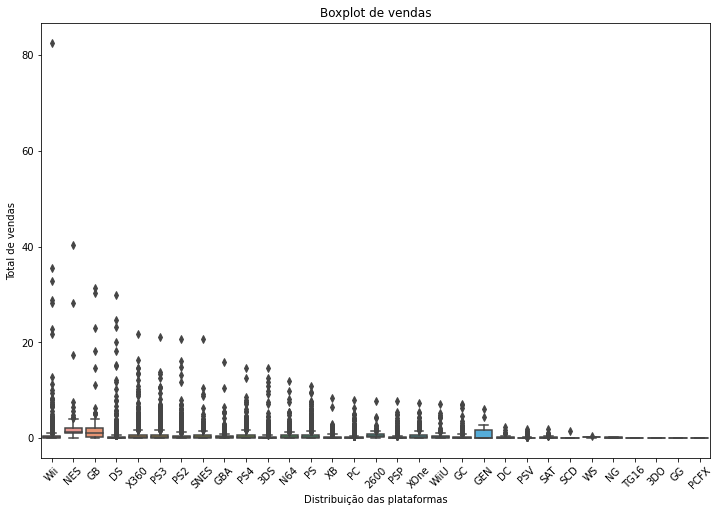

In [28]:
#construindo um boxplot do total de vendas dividido por plataforma

#agrupar os dados por vendas
sales_data = games_df[['platform','total_sales']]

#realizar a plotagem do gráfico com os dados
plt.figure(figsize=(12,8))    
sns.boxplot(x='platform', y='total_sales', data=sales_data)
plt.title("Boxplot de vendas")
plt.xlabel("Distribuição das plataformas")
plt.ylabel("Total de vendas")
plt.xticks(rotation=45)

plt.show()

    Com base no boxplot dos dados, é possível observar que dentro do total de vendas para cada uma das plataformas há vários outliers.

In [29]:
#caculando as vendas médias por plataforma
mean_sales_by_platform = sales_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Vendas médias por plataforma:")
print(mean_sales_by_platform)

Vendas médias por plataforma:
platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64


    Com relação as vendas médias por plataforma podemos observar um comportamento diferente do top 3 plataformas mais vendidas. Nesse caso temos GB, NES e GEN sendo o top 3 plataformas com maior número de vendas médias.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Vamos reconstruir o boxplot para o período de dados filtrado.
</div>


<b> Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

Correlação entre Avaliações de Usuários e Vendas: 0.21147951638016324
Correlação entre Avaliações de Críticos e Vendas: 0.3674538695723079


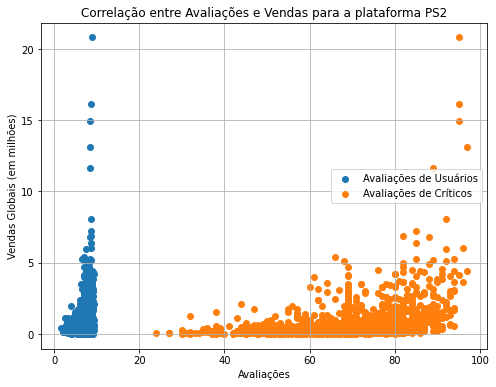

In [30]:
# Em função da participação nas vendas vou trabalhar com a plataforma PS2
selected_platform = 'PS2'

# Filtrando os dados para a plataforma escolhida
platform_data = games_df[games_df['platform'] == selected_platform]

# Criando um gráfico de dispersão das vendas em relação às avaliações de usuários e críticos
plt.figure(figsize=(8, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], label='Avaliações de Usuários')
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], label='Avaliações de Críticos')
plt.xlabel('Avaliações')
plt.ylabel('Vendas Globais (em milhões)')
plt.title(f'Correlação entre Avaliações e Vendas para a plataforma {selected_platform}')
plt.legend()
plt.grid(True)

# Calculando a correlação entre as revisões e as vendas
correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f"Correlação entre Avaliações de Usuários e Vendas: {correlation_user}")
print(f"Correlação entre Avaliações de Críticos e Vendas: {correlation_critic}")

# Exibindo o gráfico de dispersão
plt.show()

     Para a plataforma PS2, ambas as correlações entre vendas e avaliações foram positivas porém fracas, ou seja, outros fatores influenciam nas vendas.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Gostei da sua escolha de visualização, acredito que favorece a compreensão.

Pessoalmente náo achei as correlaçõesm tão fracas assim, mas respeito sua opinião....

Só fique esperto pois a conslusão a partir de uma possível correlação fraca é que essa variável especificamente não se relaciona com o fenômeno, mas não necessáriamente teremos outra que o faça (como você sugere). Pode ocorrer de não termos nenhuma.

</div>


<b>Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

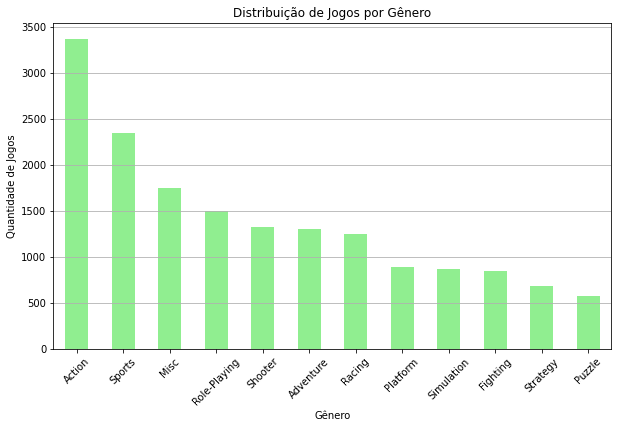

In [31]:
# Preciso determinar qual o total de cada gênero
genre_counts = games_df['genre'].value_counts()

# Para visualizar o total de jogos por gênero vou trabalhar com gráfico de barras
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

    Com base neste gráfico, podemos ver que os gêneros Ação, Esportes e Diversos (Misc) ocupam o top 3 gêneros mais jogados. 

In [32]:
# Identificando os gêneros mais lucrativos
#Agrupar por genero e vendas totais
total_sales_by_genre = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print("Gêneros mais lucrativos pelo total de vendas:")
print(total_sales_by_genre)


Gêneros mais lucrativos pelo total de vendas:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


    E com base nas informações de quais são os gêneros mais lucrativos, podemos observar que Ação e Esportes, além de serem os que mais aparecem no top 3 do gráfico anterior, também são os mais lucrativos.
    Um comportamento esperado uma vez que jogos que tragam uma sensação de adrenalina (como jogos de ação) e competição (como esportes) tendem a ser mais chamativos do que outros gêneros.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com  a conclusão sobre os gêneros.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Faltou investigar o comportamento do mesmo jogo em diferentes plataformas.
</div>


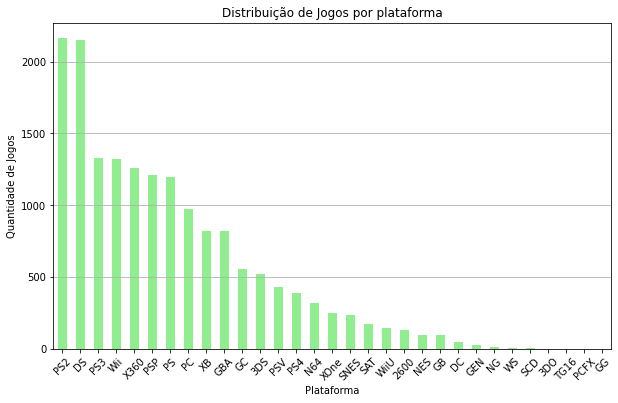

In [33]:
# Preciso determinar qual o total de cada gênero
platform_counts = games_df['platform'].value_counts()

# Para visualizar o total de jogos por gênero vou trabalhar com gráfico de barras
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de Jogos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [34]:
# Identificando os gêneros mais lucrativos
#Agrupar por genero e vendas totais
games_platform = games_df.groupby('platform')['name'].value_counts().sort_values(ascending=False).head()

print("")
print(games_platform)


games_platform


platform  name                       
PC        Need for Speed: Most Wanted    2
PS3       Sonic the Hedgehog             2
          Madden NFL 13                  2
X360      Need for Speed: Most Wanted    2
PSP       Football Manager 2012          1
Name: name, dtype: int64


platform  name                       
PC        Need for Speed: Most Wanted    2
PS3       Sonic the Hedgehog             2
          Madden NFL 13                  2
X360      Need for Speed: Most Wanted    2
PSP       Football Manager 2012          1
Name: name, dtype: int64

# Passo 4. Crie um perfil de usuário para cada região

<b>Para cada região (AN, UE, JP), determine:

    - As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
    - Os cinco principais gêneros. Explique a diferença.
    - As classificações do ESRB afetam as vendas em regiões individuais?

In [35]:
#Separando as principais plataformas por região

#Separando as principais plataformas comercializadas na América do Norte
an_five_plats =  games_df.groupby('na_sales')['platform'].value_counts().sort_values(ascending=False).head()
print("As cinco principais plataformas comercializadas na América do Norte são:")
print(an_five_plats)

print()

#Separando as principais plataformas comercializadas na União Euroéia
ue_five_plats =  games_df.groupby('eu_sales')['platform'].value_counts().sort_values(ascending=False).head()
print("As cinco principais plataformas comercializadas na União Européia são:")
print(ue_five_plats)

print()

#Separando as principais plataformas comercializadas no Japão
jp_five_plats =  games_df.groupby('jp_sales')['platform'].value_counts().sort_values(ascending=False).head()
print("As cinco principais plataformas comercializadas no Japão são:")
print(jp_five_plats)


As cinco principais plataformas comercializadas na América do Norte são:
na_sales  platform
0.0       DS          626
          PSP         620
          PC          574
          PS2         513
          PS3         323
Name: platform, dtype: int64

As cinco principais plataformas comercializadas na União Européia são:
eu_sales  platform
0.0       DS          1385
          PSP          897
          Wii          588
          PS2          526
          PS3          370
Name: platform, dtype: int64

As cinco principais plataformas comercializadas no Japão são:
jp_sales  platform
0.0       DS          1387
          PS2         1364
          Wii         1047
          PC           972
          X360         886
Name: platform, dtype: int64


    Com base nestes resultados, é possível observar que o nintendo DS foi a plataforma mais vendida nas três regiões avaliadas. O PSP foi o segndo mais vendido na América do Norte e na União Europeia mas perdeu lugar para o PS2 no Japão.

In [36]:
#Separando os principais gêneros por região

#Separando os principais gêneros comercializados na América do Norte
an_five_gens =  games_df.groupby('na_sales')['genre'].value_counts().sort_values(ascending=False).head()
print("Os cinco principais gêneros comercializadas na América do Norte são:")
print(an_five_gens)

print()

#Separando os principais gêneros comercializados na União Euroéia
ue_five_gens =  games_df.groupby('eu_sales')['genre'].value_counts().sort_values(ascending=False).head()
print("Os cinco principais gêneros comercializadas na União Européia são:")
print(ue_five_gens)

print()

#Separando os principais gêneros comercializados no Japão
jp_five_gens =  games_df.groupby('jp_sales')['genre'].value_counts().sort_values(ascending=False).head()
print("Os cinco principais gêneros comercializadas no Japão são:")
print(jp_five_gens)


Os cinco principais gêneros comercializadas na América do Norte são:
na_sales  genre       
0.0       Action          752
          Adventure       750
          Role-Playing    624
          Misc            530
          Sports          487
Name: genre, dtype: int64

Os cinco principais gêneros comercializadas na União Européia são:
eu_sales  genre       
0.0       Action          915
          Adventure       805
          Misc            796
          Sports          785
          Role-Playing    718
Name: genre, dtype: int64

Os cinco principais gêneros comercializadas no Japão são:
jp_sales  genre  
0.0       Action     2175
          Sports     1747
          Misc       1210
          Racing     1019
          Shooter     943
Name: genre, dtype: int64


    De maneira semelhante aos gêneros mais comercializados globalmente, temos o gênero Ação em primeiro lugar nas três regiões avaliadas. O Gênero aventura é o segundo mais comercializado na América do Norte e na União Européia. Ainda o Japão apresenta alta participação no total de vendas com mais que o dobro das vendas do gênero de Ação em comparação as vendas na América do Norte e na União Européia.

In [37]:
#Separando as principais classificações ESRB pore região

#Separando as principais classificações comercializadas na América do Norte
an_five_rating =  games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
print("As cinco principais classificações comercializadas na América do Norte são:")
print(an_five_rating)

print()

#Separando as principais classificações comercializadas na União Euroéia
ue_five_rating =  games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
print("As cinco principais classificações comercializadas na União Européia são:")
print(ue_five_rating)

print()

#Separando as principais classificações comercializadas no Japão
jp_five_rating =  games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
print("As cinco principais classificações comercializadas no Japão são:")
print(jp_five_rating)


As cinco principais classificações comercializadas na América do Norte são:
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

As cinco principais classificações comercializadas na União Européia são:
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

As cinco principais classificações comercializadas no Japão são:
rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


    Com relação as classificações comercializadas por região, temos a classificação livre (E - Everyone) sendo a mais comercializada nas três regiões. A classificação adolescentes (T - Teen) é a segunda mais comercializada na América do Norte e no Japão, seguido nesse caso pela classificação Adulto (M - Mature) nessas regiões. Na União Européia observamos uma inversão com a classificação Adulta sendo a segunda mais comercializada, seguida da classificação adolescentes.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Seus dados e sua conclusão estão corretos, mas ficariam melhorers expostos se acompanhados de gráficos.
</div>


# Passo 5. Teste as seguintes hipóteses:

  <b>  
    
    — As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
    — As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
    
    Defina o valor do limiar *alfa** você mesmo.
    
    Explique:
    — Como você formula as hipóteses alternativas e nulas.
    — Quais critérios você usou para testar as hipóteses, e por quê

In [38]:
#Determinar se as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

#separar os dados de cada plataforma
xone_rating = games_df[games_df['platform'] =='XOne']['user_score']
pc_rating = games_df[games_df['platform'] =='PC']['user_score']

#aplicar o teste t-student
results = st.ttest_ind(xone_rating, pc_rating, equal_var=False)

alpha_platform = 0.01

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha_platform:
    print("Existe diferença entre as plataformas Xbox One e PC.")
else:
    print("Não existe diferença entre as plataformas Xbox One e PC.")

Existe diferença entre as plataformas Xbox One e PC.


    As hipóteses foram criadas no intuido de averiguar se há ou não diferença estatistica, nesse caso ao nível de 1% de probabilidade de erro, entre as as classificações médias dos usuários das plataformas Xbox One e PC, onde, se p<0,01 existe diferença significativa entre os dados analisados, e se p>0,01 não existe diferença. 
    
    Adotei alpha = 0.01 para testar se existe realmente diferença entre as plataformas avaliadas. 
    
    Conforme observado, a hipotese H0 é nula pois as classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas.

In [39]:
# Determinar se as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

#separar os dados de cada gênero
action_rating = games_df[games_df['genre'] =='Action']['user_score']
sports_rating = games_df[games_df['genre'] =='Sports']['user_score']

#aplicar o teste t-student

results_genres = st.ttest_ind(action_rating, sports_rating, equal_var=False)

alpha_genre=0.01

#verificar se o valor p é menor que o nível de significancia
if results.pvalue < alpha_genre:
    print("Existe diferença entre os gêneros Ação e Esportes.")
else:
    print("Não existe diferença entre os gêneros Ação e Esportes.")

Existe diferença entre os gêneros Ação e Esportes.


    Conforme os resultados obtidos como p<0,01 aceita-se H0, ou seja, existe diferença entre as classificações médias dos gêneros Ação e Esportes.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Os teses foram bem conduzidos, mas é sempre uma boa prática expor o valor p para sabermos o quão loge estamos do limite escolhido (e se não houve eventualmente um erro no teste). Além disso descrever detalhadamente H0 e H1 é sempre importante.
</div>


# Passo 6. Escreva uma conclusão geral

    Com base nos dados é possível chegar a algumas conclusões. O mercado dos games e das plataformas evoluiu de tal forma que muitas empresas tiveram que se atualizar para continuar no mercado, criando novas plataformas com o passar dos anos e conforme as demandas por consoles com melhores gráficos.
    
    Os dados apresentam outliers no total de vendas para algumas das plataformas avaliadas.
    
    No geral, o gênero Ação é o que possui a maior quantidade de jogos e também é o que pe o mais lucrativo.
    
    O perfil de usuário é o mesmo nas regiões avaliadas quando analisamos a plataforma, o gênero e a classificação mais consumidas nessas regiões, apresentando diferenças entre as regiões quando analisamos os segundos e terceiros colocados na classificação do top 5.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>
